<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Cakra !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Cakra ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Cakra dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Tahap 4. Analisis data eksploratif (Python)

Selain data yang kamu peroleh dalam tugas sebelumnya, kamu sudah diberikan file kedua. Sekarang, kamu memiliki dua file CSV berikut:

/datasets/project_sql_result_01.csv - memuat data berikut ini:

- company_name: nama perusahaan taksi

- trips_amount: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

/datasets/project_sql_result_04.csv - memuat data berikut ini:

- dropoff_location_name: nama wilayah di Chicago tempat perjalanan berakhir

- average_trips: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

Untuk kedua dataset tersebut, sekarang kamu perlu untuk

- mengimpor kedua file

- mempelajari isi data

- memastikan tipe datanya sudah benar

- mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran

- membuat grafik: perusahaan taksi dan jumlah perjalanannya, 10 wilayah teratas berdasarkan jumlah pengantaran

- menarik kesimpulan berdasarkan grafik yang sudah dibuat dan menjelaskan hasilnya


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.1 Mengimpor kedua file dan mempelajari isi data

In [5]:
# Memasukkan library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, shapiro, mannwhitneyu

In [6]:
dataset = r'C:/Users/cakra2/OneDrive/Desktop/TripleTen-Project-Sprint/PROJECT 6/DATASET/'

In [7]:
# Memasukkan kedua data dan mempelajari isi data untuk analisis
data1 = pd.read_csv(dataset + 'moved_project_sql_result_01.csv')
data1.info()
data1.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
18,24 Seven Taxi,1775
22,Chicago Independents,1296
47,4615 - 83503 Tyrone Henderson,21
29,303 Taxi,250
34,Norshore Cab,127


In [8]:
dataset = r'C:/Users/cakra2/OneDrive/Desktop/TripleTen-Project-Sprint/PROJECT 6/DATASET/'
data2 = (dataset + 'moved_project_sql_result_04.csv')
data2.info()
data2.sample(5)

AttributeError: 'str' object has no attribute 'info'

**DESCRIPTION**

Pada tahap ini data dan juga library yang diperlukan telah dimasukkan. Terlihat `data1` merupakan data jumlah perjalanan pada masing masing perushaan. Sedangkan `data2` merupakan rata rata perljalanan pada masing masing wilayah. Selanjutnya data di cek apakah ada nilai hilang serta memastikan tipe data.  

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.2 Cek data hilang dan memastikan tipe data

In [ ]:
# Cek data hilang 
data1.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [ ]:
data2.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [ ]:
# memastikan tipe data pada masing masing data
data1['trips_amount'] = data1['trips_amount'].astype('int16')
data1.dtypes

company_name    object
trips_amount     int16
dtype: object

In [ ]:
data2['average_trips'] = data2['average_trips'].astype('float32')
data2.dtypes

dropoff_location_name     object
average_trips            float32
dtype: object

**DESCRIPTION**

Terlihat bahwa tidak ada nilai hilang pada masing masing data dan tipe data tersebut telah di sesuaikan dengan masing masing data. Selanjutnya kita cari 10 perusahaan dengan jumlah perjalanan tertinggi dan buat grafiknya

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.3 Presentase Top 10 Perusahaan dengan Jumlah Perjalanan Tertinggi"

In [ ]:
# Membuat kolom baru berbentuk presentase dari trips_amount
total_trips = data1['trips_amount'].sum()
data1['percentage'] = (data1['trips_amount'] / total_trips) * 100

In [ ]:
# mengidentifikasi 10 jumlah perjalanan teratas pada masing masing perushaaan
top_company = data1.sort_values(by='trips_amount', ascending=False)[:10]
top_company

,company_name,trips_amount,percentage
0,Flash Cab,19558,14.243578
1,Taxi Affiliation Services,11422,8.318343
2,Medallion Leasing,10367,7.550014
3,Yellow Cab,9888,7.201171
4,Taxi Affiliation Service Yellow,9299,6.772218
5,Chicago Carriage Cab Corp,9181,6.686282
6,City Service,8448,6.152457
7,Sun Taxi,7701,5.608436
8,Star North Management LLC,7455,5.429281
9,Blue Ribbon Taxi Association Inc.,5953,4.335414


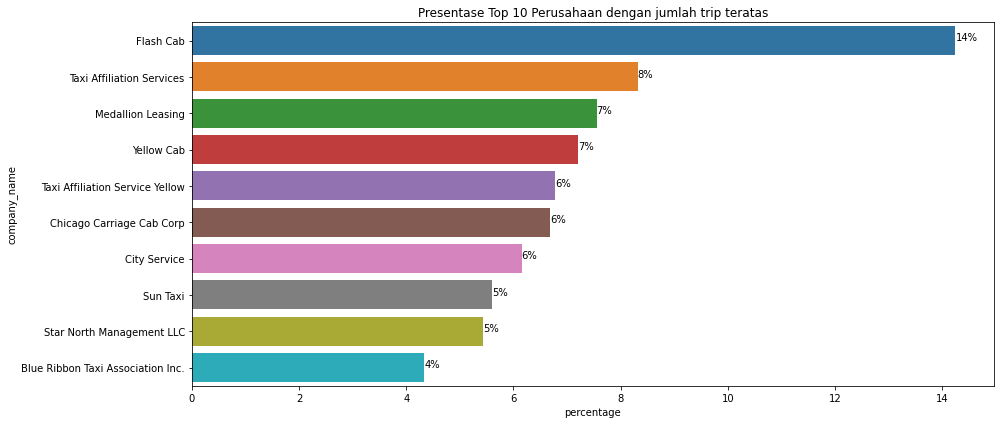

In [ ]:
# Grafik presentase top 10 Perusahaan dengan jumlah trip teratas
plt.figure(figsize=(14, 6))
plt.title('Presentase Top 10 Perusahaan dengan jumlah trip teratas')
ax = sns.barplot(data=top_company, x='percentage', y='company_name')


for p in ax.patches: 
    ax.annotate(f'{int(p.get_width()):.0f}%', (p.get_width(), p.get_y() + p.get_height() / 2)) 

plt.tight_layout()
plt.show()

**DESCRIPTION**

- Findings:
  - Dalam 2 hari perusahaan taksi "Flash Cab" adalah perusahaan dengan jumlah perjalanan tertinggi, mencapai sekitar 14% (19558 trip) dari total perjalanan.

  - Perusahaan "Taxi Affiliation Services" dan "Medallion Leasing" juga memiliki jumlah perjalanan yang signifikan, masing-masing sekitar 8% dan 7% dari total perjalanan.


- Insights:
  - Perusahaan taksi "Flash Cab" merupakan memiliki jumlah perjalanan tertinggi diantara lainna
  - Dibandingkan kompetitor rangking kedua, jumlah perjalanan "Flash Cab" 2x lipat dari Taxi Affiliation Services
  - "Flash Cab" menjadi pesaing terkuat Zuber

- Recommendation:

  - Perusahaan "Flash Cab" merupakan pesaing terkuat perusahaan "Zuber" di Chicago, oleh karena itu Zuber harus mempelajari apa yang menyebabkan perusahaan tersebut memiliki trip yang sangat tinggi hingga 2x lipat.


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.4  Presentase Top 10 jumlah rata rata perjalanan pada masing masing wilayah"

In [ ]:
# Membuat kolom baru berbentuk presentase dari average_trips
total_trips = data2['average_trips'].sum()

# Membuat kolom baru 'percentage' yang berisi presentase setiap nilai terhadap total
data2['percentage'] = (data2['average_trips'] / total_trips) * 100

In [ ]:
# mengidentifikasi 10 jumlah rata-rata perjalanan yang berakhir di setiap wilayah
top_dropoff = data2.sort_values(by='average_trips', ascending=False).head(10)
top_dropoff


,dropoff_location_name,average_trips,percentage
0,Loop,10727.466797,19.021799
1,River North,9523.666992,16.887238
2,Streeterville,6664.666504,11.817697
3,West Loop,5163.666504,9.156143
4,O'Hare,2546.899902,4.516129
5,Lake View,2420.966553,4.292825
6,Grant Park,2068.533447,3.667896
7,Museum Campus,1510.000000,2.677512
8,Gold Coast,1364.233276,2.419040
9,Sheffield & DePaul,1259.766724,2.233801


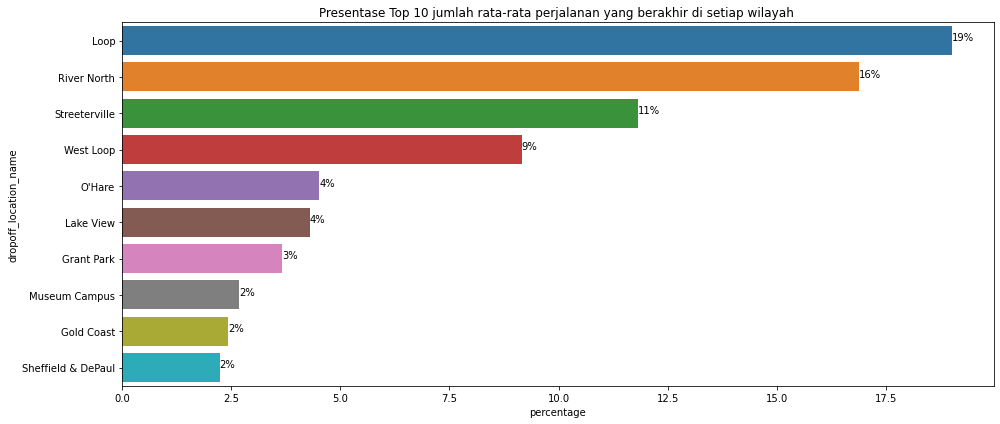

In [ ]:
# Grafik Presentase Top 10 jumlah rata-rata perjalanan yang berakhir di setiap wilayah
plt.figure(figsize=(14, 6))
plt.title('Presentase Top 10 jumlah rata-rata perjalanan yang berakhir di setiap wilayah ')
ax = sns.barplot(data=top_dropoff, x='percentage', y='dropoff_location_name')

# Add labels to the bars

for p in ax.patches: 
    ax.annotate(f'{int(p.get_width()):.0f}%', (p.get_width(), p.get_y() + p.get_height() / 2)) 

plt.tight_layout()
plt.show()



**DESCRIPTION**
- Findings:

  - Wilayah "Loop" adalah yang paling banyak dikunjungi dengan rata-rata perjalanan sekitar 19%(10727.466797) dari total perjalanan.
  - Wilayah "River North" dan "Streeterville" juga memiliki rata-rata perjalanan yang tinggi, masing-masing sekitar 16.89% dan 11.82% dari total perjalanan.


- Insights:

   - Beberapa wilayah "Loop," "River North," dan "Streeterville" menjadi titik-titik tujuan yang paling populer. Ini mungkin karena keberadaan berbagai atraksi wisata, restoran, dan bisnis di wilayah-wilayah ini.


- Recommendation:

  - Perusahaan Zuber dapat mempertimbangkan peningkatan layanan di wilayah-wilayah yang paling sering dikunjungi, seperti "Loop" dan "River North," untuk memenangkan lebih banyak pelanggan.
  - Ini juga memungkinkan bahwa perusahaan kompetitor sering mengambil pelanggan di ketiga wilayah tersebut seperti "Loop", "River North", dan "Streeterville".

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Tahap 5. Menguji hipotesis (Python)

/datasets/project_sql_result_07.csv — hasil dari kueri terakhir. File ini memuat data perjalanan dari Loop ke Bandara Internasional O'Hare. Ingat, berikut adalah nilai kolom-kolom yang ada di tabel ini:

- start_ts -- tanggal dan waktu penjemputan

- weather_conditions -- kondisi cuaca saat perjalanan dimulai

- duration_seconds -- durasi perjalanan dalam satuan detik

Uji hipotesis berikut:

"Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu." 

Tentukan secara mandiri seberapa besar level signifikansinya (alpha).

Jelaskan:


- Bagaimana kamu merumuskan hipotesis nol dan hipotesis alternatif

- Kriteria apa yang kamu gunakan untuk menguji hipotesis dan alasan menggunakannya

In [ ]:
# Mengimpor data dan mempelajari data 

path3 = (dataset + 'moved_project_sql_result_07.csv')
data3 = pd.read_csv(path3) 
data3.info()
data3.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
736,2017-11-04 14:00:00,Good,2948.0
243,2017-11-11 05:00:00,Good,1320.0
628,2017-11-18 07:00:00,Bad,1200.0
158,2017-11-11 17:00:00,Good,2160.0
589,2017-11-18 12:00:00,Bad,2606.0


In [ ]:
data3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [ ]:
# Mengecek data hilang
data3.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [ ]:
# Memastikan tipe data
data3['start_ts'] = pd.to_datetime(data3['start_ts'])

In [ ]:
# Memastikan hari adalah hari sabtu
data3['start_ts'].dt.weekday.unique()

array([5])

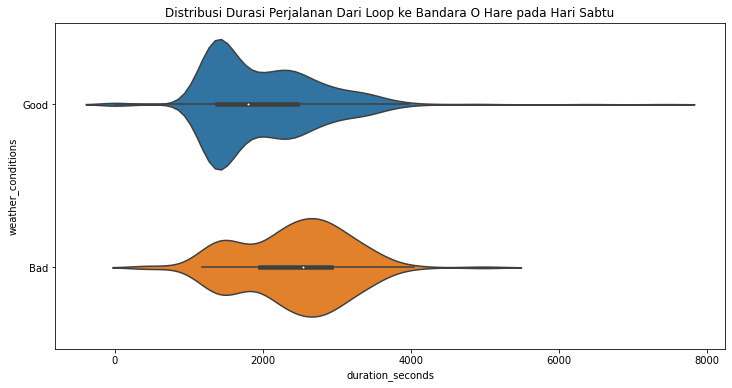

In [ ]:
# Membuat violinplot distribusi durasi perjalanan dari wilayah Loop ke O Hare di hari Sabtu
plt.figure(figsize=(12, 6))
plt.title('Distribusi Durasi Perjalanan Dari Loop ke Bandara O Hare pada Hari Sabtu')
sns.violinplot(data=data3, x='duration_seconds', y='weather_conditions')
plt.show()

In [ ]:
# Memisahkan data cuaca bagu dan cuaca buruk
good_weather = data3.loc[data3['weather_conditions'] == 'Good']
bad_weather = data3.loc[data3['weather_conditions'] == 'Bad']

In [ ]:
# Function untuk membersihkan outlier untuk data diatas
def remove_outliers_iqr(data):
    Q1 = data['duration_seconds'].quantile(0.25)
    Q3 = data['duration_seconds'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data['duration_seconds'] >= lower_bound) & (data['duration_seconds'] <= upper_bound)]


In [ ]:
# Membersihkan outlier untuk distribusi pada cuaca bagus
good = remove_outliers_iqr(good_weather)
good

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


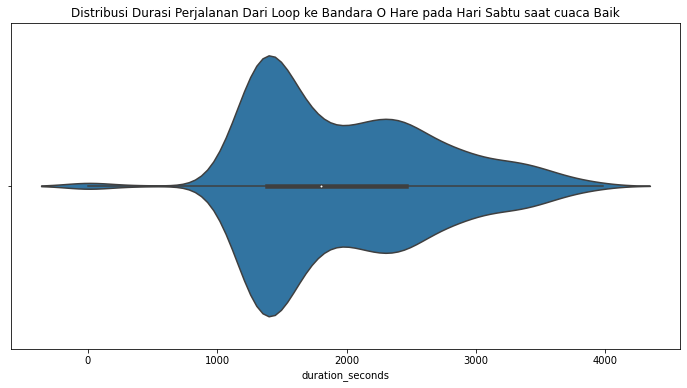

In [ ]:
# Grafik distribusi cuaca bagus 
plt.figure(figsize=(12, 6))
plt.title('Distribusi Durasi Perjalanan Dari Loop ke Bandara O Hare pada Hari Sabtu saat cuaca Baik')
sns.violinplot(data=good, x='duration_seconds')
plt.show()

In [ ]:
# Membersihkan outlier untuk distribusi pada cuaca buruk
bad = remove_outliers_iqr(bad_weather)
bad

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


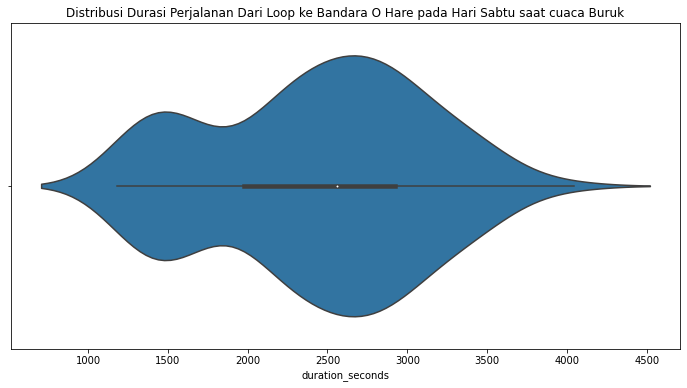

In [ ]:
# Grafik distribusi cuaca buruk
plt.figure(figsize=(12, 6))
plt.title('Distribusi Durasi Perjalanan Dari Loop ke Bandara O Hare pada Hari Sabtu saat cuaca Buruk')
sns.violinplot(data=bad, x='duration_seconds')
plt.show()

In [ ]:
# Mengambil durasi waktu pada data dengan outlier yang telah dibersihkan
good_duration = good['duration_seconds']
bad_duration  = bad['duration_seconds']

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [ ]:
# uji kesamaan variasi distribusi
p_value = levene(good_duration, bad_duration, center='median').pvalue

In [ ]:
# uji distribusi normal pada masing masing data, jika p-value <5% distribusinya tidak normal
shapiro(good_duration).pvalue

8.395970071377549e-19

In [ ]:
shapiro(bad_duration).pvalue

0.0002595653641037643

- Hipotesis
    - H0: Rata2 Durasi Perjalanan dari Loop ke Bandara O Hare pada hari sabtu saat hujan dan tidak hujan adalah sama
    - H1: Rata2 Durasi Perjalanan dari Loop ke Bandara O Hare pada hari sabtu saat hujan dan tidak hujan adalah berbeda

- Metode: Independent Two sample test (mannwhitneyu)
- Alpha: 5%

In [ ]:
# Dikarenakan distribusi tidak normal kita gunakan Mann-Whitney U Test (Non-Parametric) 
alpha = 0.05

# Perform Mann-Whitney U test
statistic, p_value_mw = mannwhitneyu(good_duration, bad_duration)

# Compare p-value to alpha
if p_value_mw < alpha:
    print("H1: Rata2 Durasi Perjalanan dari Loop ke Bandara O Hare pada hari sabtu saat hujan dan tidak hujan adalah berbeda")
else:
    print("Fail to reject the null hypothesis: Tidak ada perbedaan yang signifikan.")


H1: Rata2 Durasi Perjalanan dari Loop ke Bandara O Hare pada hari sabtu saat hujan dan tidak hujan adalah berbeda


In [ ]:
# Rata-rata Durasi Perjalanan dari Loop ke Bandara O Hare pada hari sabtu saat hujan dan tidak hujan adalah berbeda
print('Rata2 Durasi Saat Normal:', good_duration.mean() / 60, 'menit')
print('Rata2 Durasi Saat Hujan :', bad_duration.mean() / 60, 'menit')

Rata2 Durasi Saat Normal: 32.946938775510205 menit
Rata2 Durasi Saat Hujan : 40.57975517890772 menit


**DESCRIPTION**

- Findings:

  - P-value dari distribusi data bad menunjukkan terdapat distribusi tidak normal 
  - Rata rata durasi perjalanan dari loop ke bandara O Hare saat normal dan hujan berbeda

- Insights:

  - Sebagian besar perjalanan dari Loop ke Bandara O'Hare pada hari Sabtu berlangsung kurang dari 4000 detik.

  - Distribusi durasi perjalanan cenderung lebih bervariasi pada cuaca "Bad," dengan beberapa perjalanan yang lebih lama.

- Recommendation:

  - Berdasarkan uji hiptotesis diatas bahwa cucaca dapa mempengaruhi durasi perjalanan terutama perjalanan dari Loop ke bandara   
  - Perusahaan Zuber dapat mempertimbangkan faktor cuaca saat merencanakan perjalanan atau menghitung perkiraan waktu perjalanan untuk penumpangnya.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Kesimpulan Umum

Pada analisis ini, kita mengeksplorasi tiga aspek berbeda dari data Zuber. Pertama, kami mengidentifikasi perusahaan taksi dan wilayah tujuan dengan jumlah perjalanan tertinggi. Kedua, kami memeriksa distribusi perjalanan dari Loop ke Bandara Internasional O'Hare, terutama pada hari Sabtu, dan membandingkannya antara cuaca baik dan cuaca buruk. Terakhir, kami mengidentifikasi perusahaan dengan jumlah perjalanan tertinggi dan wilayah tujuan dengan rata-rata perjalanan tertinggi.

- Hasilnya adalah:

  - "Flash Cab" adalah perusahaan taksi dengan jumlah perjalanan tertinggi, yang dapat menjadi pesaing kuat untuk perusahaan Zuber. Mereka memiliki jumlah perjalanan lebih dari dua kali lipat dari perusahaan taksi rangking kedua.

  - Wilayah "Loop" adalah destinasi yang paling sering dikunjungi oleh penumpang, diikuti oleh "River North" dan "Streeterville." Ini mengindikasikan bahwa Zuber harus mempertimbangkan untuk meningkatkan layanan di wilayah-wilayah ini untuk memenangkan lebih banyak pelanggan.

  - Berdasarkan analisis cuaca, terdapat perbedaan signifikan dalam durasi perjalanan dari Loop ke Bandara Internasional O'Hare saat cuaca buruk dibandingkan dengan cuaca baik. Pada cuaca buruk, rata-rata durasi perjalanan lebih lama, yang bisa menjadi faktor yang perlu dipertimbangkan oleh Zuber dalam merencanakan perjalanan.
  

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>